data in Jul18 file. Have two kinds of init conditions, perturbation or not. Temporarily only have for const supply.

In [1]:
import torch
import matplotlib
matplotlib.rcParams.update({'font.size': 11})

import matplotlib.pyplot as plt
from pathlib import Path

from scipy.io import loadmat

datapath = Path('./data/').expanduser()
loaded = torch.load(datapath/'torch_test')
matload = loadmat("./data/newEGCnstd.mat")

Outputs = loaded['Outputs'] # Outputs[0]: FU_J; Outputs[1]: FU_GC; Outputs[2]: E;
EGC_m_std = torch.tensor(matload["EGC_m_std"])
Outputs[2] = EGC_m_std[0] # new E replace

Ns_span = loaded['Ns_span']
rho_span = loaded['rho_span']
Nr = loaded['Nr']
num_try = Outputs.size(dim = 1)

In [2]:
NsNr = torch.ones(num_try,len(Ns_span),len(rho_span)) * (torch.tensor(Ns_span).view(1,len(Ns_span)).transpose(0,1) * torch.ones(1,len(rho_span)))/Nr

For pertubation

Text(0, 0.5, 'Encroachment, $E(G,C)$')

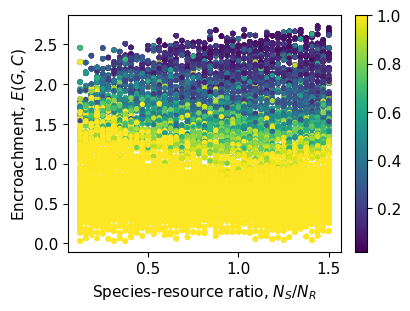

In [3]:
datapath = Path('./data/Jul18/')
Fractions = (torch.load(datapath/'allFractionsP.pt')['Fractions']).transpose(0,1).transpose(1,2).transpose(0,3)
# 0: surviving fraction, 1: fluc fraction, 2: alt ss fraction
# Fractions[1][Outputs[0] == 0] = 0 # no fluctuation when stable!

plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(NsNr,Outputs[2],c=Fractions[0], s=8) # color is surviving fraction
plt.colorbar()

plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')

In [4]:
heat_values = torch.zeros(3,28,len(Ns_span))
num_point = torch.zeros(28,len(Ns_span))
for i in range(Outputs.size(dim=2)):
    for j in range(Outputs.size(dim=3)):
       for k in range(num_try):
            ii = 27 - int(Outputs[2,k,i,j] * 10)
            #jj = int(NsNr[k,i,j] * Nr / 4) - 1
            jj = int(NsNr[k,i,j] * Nr - 4)
            heat_values[:,ii,jj] = (num_point[ii,jj]*heat_values[:,ii,jj] + Fractions[:,k,i,j])/(num_point[ii,jj] + 1)
            num_point[ii,jj] = num_point[ii,jj] + 1

Text(0, 0.5, 'Encroachment, $E(G,C)$')

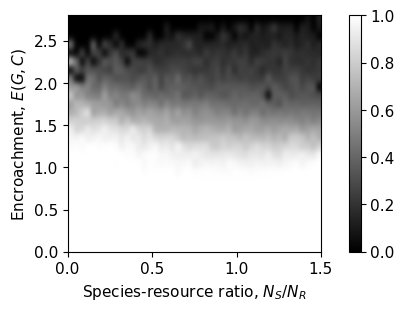

In [5]:
heat_values[0,26:,:] = torch.ones(heat_values[0,26:,:].size())
# sur fraction
extent = .0, 1.5, .0, 2.8
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_values[0], extent=extent, interpolation='gaussian', cmap='gray', aspect=0.5)
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
#plt.savefig('./figures/SurvivalFrac_heatP.eps', format='eps')

Text(0, 0.5, 'Encroachment, $E(G,C)$')

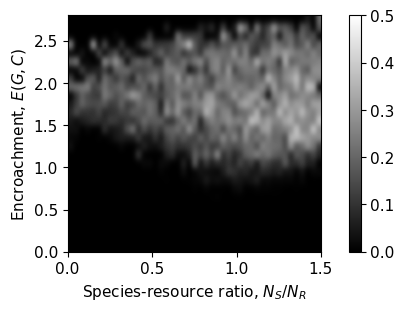

In [6]:
# fluctuation
extent = .0, 1.5, .0, 2.8
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_values[1], extent=extent, interpolation='gaussian', cmap='gray', aspect=0.5, vmin=0.0, vmax=0.5)
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
#plt.savefig('./figures/Fluctuation_heatP.eps', format='eps')

Text(0, 0.5, 'Encroachment, $E(G,C)$')

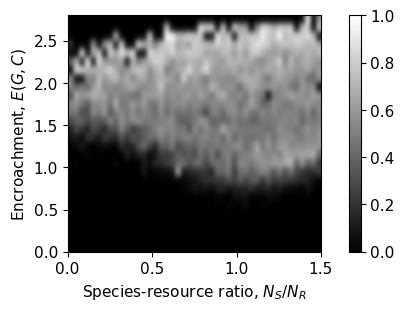

In [7]:
# alt ss
extent = .0, 1.5, .0, 2.8
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_values[2], extent=extent, interpolation='gaussian', cmap='gray', aspect=0.5, vmin=0.0, vmax=1.0)
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
#plt.savefig('./figures/AltSS_heatP.eps', format='eps')

Without pertubation!

In [8]:
datapath = Path('./data/Jul18/')
Fractions = (torch.load(datapath/'allFractionsnP.pt')['Fractions']).transpose(0,1).transpose(1,2).transpose(0,3)
# 0: surviving fraction, 1: fluc fraction, 2: alt ss fraction
# Fractions[1][Outputs[0] == 0] = 0 # no fluctuation when stable!

In [9]:
heat_values = torch.zeros(3,28,len(Ns_span))
num_point = torch.zeros(28,len(Ns_span))
for i in range(Outputs.size(dim=2)):
    for j in range(Outputs.size(dim=3)):
       for k in range(num_try):
            ii = 27 - int(Outputs[2,k,i,j] * 10)
            #jj = int(NsNr[k,i,j] * Nr / 4) - 1
            jj = int(NsNr[k,i,j] * Nr - 4)
            heat_values[:,ii,jj] = (num_point[ii,jj]*heat_values[:,ii,jj] + Fractions[:,k,i,j])/(num_point[ii,jj] + 1)
            num_point[ii,jj] = num_point[ii,jj] + 1

Text(0, 0.5, 'Encroachment, $E(G,C)$')

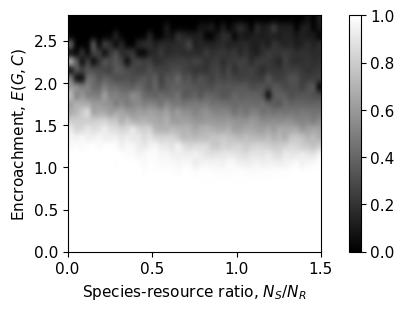

In [10]:
heat_values[0,26:,:] = torch.ones(heat_values[0,26:,:].size())
# sur fraction
extent = .0, 1.5, .0, 2.8
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_values[0], extent=extent, interpolation='gaussian', cmap='gray', aspect=0.5)
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
#plt.savefig('./figures/SurvivalFrac_heatnP.eps', format='eps')

In [11]:
A = 1.0
B = 0.7
ep = 0.00001
X = torch.linspace(0.05,1.5,100)
Y = A+B*(1-ep**(1/(X*32)))

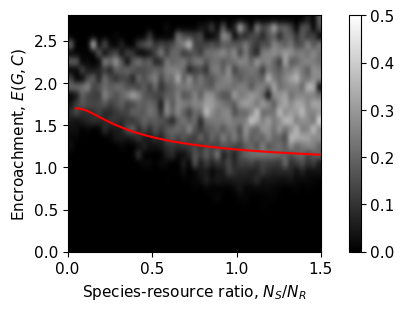

In [12]:
# fluctuation
extent = .0, 1.5, .0, 2.8
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_values[1], extent=extent, interpolation='gaussian', cmap='gray', aspect=0.5, vmin=0.0, vmax=0.5)
plt.colorbar()
plt.plot(X,Y,c='r')
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
plt.savefig('../figures/Fluctuation_heatnP.eps', format='eps')

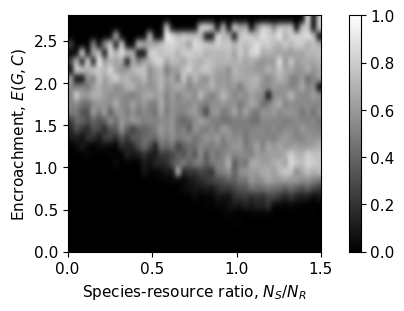

In [12]:
# alt ss
extent = .0, 1.5, .0, 2.8
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_values[2], extent=extent, interpolation='gaussian', cmap='gray', aspect=0.5, vmin=0.0, vmax=1.0)
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
#plt.savefig('./figures/AltSS_heatnP.eps', format='eps')

In [13]:
datapath = Path('./data/Jul18/')
Fractions = (torch.load(datapath/'allFractionsSP.pt')['Fractions']).transpose(0,1).transpose(1,2).transpose(0,3)
# 0: surviving fraction, 1: fluc fraction, 2: alt ss fraction
# Fractions[1][Outputs[0] == 0] = 0 # no fluctuation when stable!

In [14]:
heat_values = torch.zeros(3,28,len(Ns_span))
num_point = torch.zeros(28,len(Ns_span))
for i in range(Outputs.size(dim=2)):
    for j in range(Outputs.size(dim=3)):
       for k in range(num_try):
            ii = 27 - int(Outputs[2,k,i,j] * 10)
            #jj = int(NsNr[k,i,j] * Nr / 4) - 1
            jj = int(NsNr[k,i,j] * Nr - 4)
            heat_values[:,ii,jj] = (num_point[ii,jj]*heat_values[:,ii,jj] + Fractions[:,k,i,j])/(num_point[ii,jj] + 1)
            num_point[ii,jj] = num_point[ii,jj] + 1

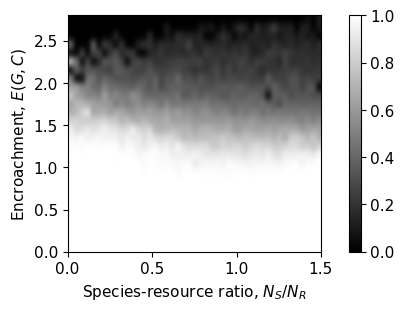

In [15]:
heat_values[0,26:,:] = torch.ones(heat_values[0,26:,:].size())
# sur fraction
extent = .0, 1.5, .0, 2.8
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_values[0], extent=extent, interpolation='gaussian', cmap='gray', aspect=0.5)
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
#plt.savefig('./figures/SurvivalFrac_heatSP.eps', format='eps')

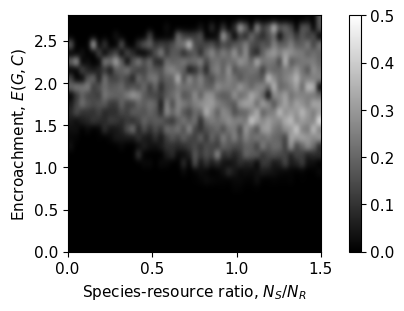

In [16]:
# fluctuation
extent = .0, 1.5, .0, 2.8
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_values[1], extent=extent, interpolation='gaussian', cmap='gray', aspect=0.5, vmin=0.0, vmax=0.5)
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
#plt.savefig('./figures/Fluctuation_heatSP.eps', format='eps')

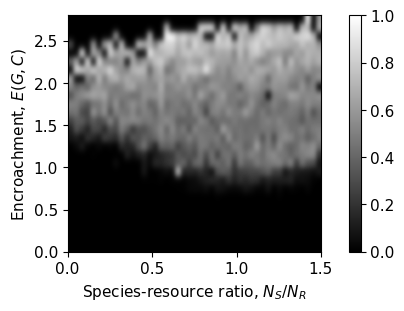

In [17]:
# alt ss
extent = .0, 1.5, .0, 2.8
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_values[2], extent=extent, interpolation='gaussian', cmap='gray', aspect=0.5, vmin=0.0, vmax=1.0)
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
#plt.savefig('./figures/AltSS_heatSP.eps', format='eps')